In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn import metrics

from helpers.regression import regression as RegressionHelper

%matplotlib inline

PATH_DATA_DEATHS = './data/computed/deaths.csv'
PATH_DATA_REDUCED_FEATURES = './data/computed/collected_data_reduced_features.csv'

## Read data for number of deaths and possible features + remove datasets with missing values

In [2]:
df = pd.read_csv(PATH_DATA_DEATHS)
df.dropna(inplace=True)

In [3]:
print(df.shape)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

(167, 7)


,total_deaths,total_deaths_per_million,gdp_per_capita,cvd_death_rate,health_expenditure_5y_avg
total_deaths,1.00,0.56,0.20,-0.20,0.40
total_deaths_per_million,0.56,1.00,0.37,-0.36,0.44
gdp_per_capita,0.20,0.37,1.00,-0.46,0.20
cvd_death_rate,-0.20,-0.36,-0.46,1.00,-0.25
health_expenditure_5y_avg,0.40,0.44,0.20,-0.25,1.00


In [4]:
df.describe()

,total_deaths,total_deaths_per_million,gdp_per_capita,cvd_death_rate,health_expenditure_5y_avg
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,2818.718563,58.542915,18895.411455,255.286431,6.438606
std,11483.018361,127.824042,19731.262705,117.425408,2.514311
min,0.000000,0.000000,661.240000,79.370000,2.224253
25%,11.000000,2.416253,4504.151000,168.003000,4.438167
50%,76.000000,11.035901,12294.876000,240.208000,6.322619
75%,600.000000,41.307728,27012.304500,320.839500,8.120057
max,120402.000000,848.052383,116935.600000,724.417000,16.795518


Drop countries with less than 100 deaths and a `ghs_score` below 40.

In [5]:
df_complete = pd.read_csv(PATH_DATA_REDUCED_FEATURES)
df_ghs = df_complete.loc[:, ["iso_code", "ghs_score"]]
df = df.merge(df_ghs, how = 'left', on = ['iso_code'])

df = df[(df.total_deaths >= 100) & (df.ghs_score >= 40)]
df.describe()

,total_deaths,total_deaths_per_million,gdp_per_capita,cvd_death_rate,health_expenditure_5y_avg,ghs_score
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,7636.706897,144.260679,30967.450155,205.110879,7.679061,56.155172
std,18595.876610,187.911615,19127.957217,110.208277,2.712991,10.772759
min,102.000000,2.432237,2993.028000,79.370000,3.035992,40.700000
25%,266.750000,26.723237,14404.767000,122.662750,5.319785,46.800000
50%,1110.000000,57.706549,27012.304500,154.823000,8.120057,54.400000
75%,5085.000000,193.238964,43677.837250,265.231250,9.298833,64.000000
max,120402.000000,848.052383,94277.965000,466.792000,16.795518,83.500000


In [6]:
df_with_countries = df.copy()
df = df.loc[:, ["total_deaths_per_million", "gdp_per_capita", "cvd_death_rate", "health_expenditure_5y_avg",
                "ghs_score"]]
df["r_cvd"] = 1 / df["cvd_death_rate"]
df["r_cvd_3"] = 1 / df["cvd_death_rate"]**3

In [7]:
print(df.shape)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

(58, 7)


,total_deaths_per_million,gdp_per_capita,cvd_death_rate,health_expenditure_5y_avg,ghs_score,r_cvd,r_cvd_3
total_deaths_per_million,1.00,0.27,-0.43,0.48,0.45,0.45,0.34
gdp_per_capita,0.27,1.00,-0.45,0.27,0.41,0.44,0.31
cvd_death_rate,-0.43,-0.45,1.00,-0.46,-0.58,-0.91,-0.71
health_expenditure_5y_avg,0.48,0.27,-0.46,1.00,0.69,0.47,0.37
ghs_score,0.45,0.41,-0.58,0.69,1.00,0.55,0.42
r_cvd,0.45,0.44,-0.91,0.47,0.55,1.00,0.93
r_cvd_3,0.34,0.31,-0.71,0.37,0.42,0.93,1.00


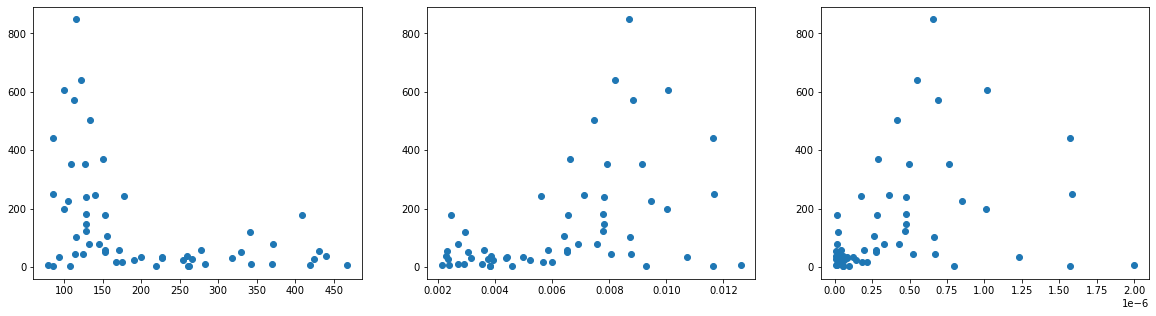

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].scatter(df["cvd_death_rate"].values, df["total_deaths_per_million"].values)
axs[1].scatter(df["r_cvd"].values, df["total_deaths_per_million"].values)
axs[2].scatter(df["r_cvd_3"].values, df["total_deaths_per_million"].values)